https://mp.weixin.qq.com/s/86VtRmkkg0nxLL6Q2FX8Sg
    
    
    

# 建议一：使用 pathlib 模块
https://docs.python.org/3/library/pathlib.html

如果你需要在 Python 里进行文件处理，那么标准库中的 os 和 os.path 兄弟俩一定是你无法避开的两个模块。在这两个模块里，有着非常多与文件路径处理、文件读写、文件状态查看相关的工具函数。

让我用一个例子来展示一下它们的使用场景。有一个目录里装了很多数据文件，但是它们的后缀名并不统一，既有 .txt，又有 .csv。我们需要把其中以 .txt 结尾的文件都修改为 .csv 后缀名。

我们可以写出这样一个函数：

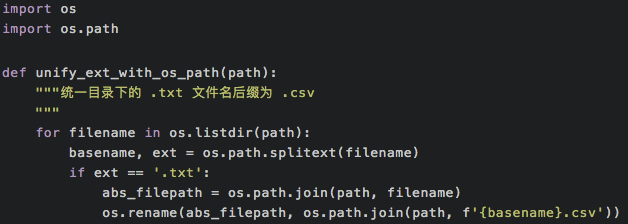

让我们看看，上面的代码一共用到了哪些与文件处理相关的函数：

os.listdir(path)：列出 path 目录下的所有文件（含文件夹）

os.path.splitext(filename)：切分文件名里面的基础名称和后缀部分

os.path.join(path,filename)：组合需要操作的文件名为绝对路径

os.rename(...)：重命名某个文件

上面的函数虽然可以完成需求，但说句实话，即使在写了很多年 Python 代码后，我依然觉得：这些函数不光很难记，而且最终的成品代码也不怎么讨人喜欢。

## 使用 pathlib 模块改写代码

为了让文件处理变得更简单，Python 在 3.4 版本引入了一个新的标准库模块：pathlib。它基于面向对象思想设计，封装了非常多与文件操作相关的功能。如果使用它来改写上面的代码，结果会大不相同。

使用 pathlib 模块后的代码：

In [1]:
from pathlib import Path

In [2]:
def unify_ext_with_pathlib(path):
    for fpath in Path(path).glob('*.txt'):
        fpath.rename(fpath.with_suffix('.csv'))

和旧代码相比，新函数只需要两行代码就完成了工作。而这两行代码主要做了这么几件事：

首先使用 Path(path) 将字符串路径转换为 Path 对象

调用 .glob('*.txt') 对路径下所有内容进行模式匹配并以生成器方式返回，结果仍然是 Path 对象，所以我们可以接着做后面的操作

使用 .with_suffix('.csv') 直接获取使用新后缀名的文件全路径

调用 .rename(target) 完成重命名

相比 os 和 os.path，引入 pathlib 模块后的代码明显更精简，也更有整体统一感。所有文件相关的操作都是一站式完成。

### 使用 / 运算符来组合文件路径

In [3]:
import os.path

In [4]:
os.path.join('/tmp', 'foo.txt')

'/tmp/foo.txt'

In [5]:
from pathlib import Path

In [6]:
Path('/tmp') / 'foo.txt'

PosixPath('/tmp/foo.txt')

### 使用 .read_text() 来快速读取文件内容：
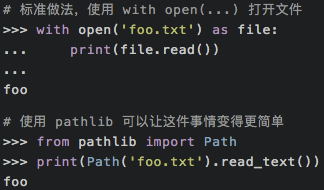

除了我在文章里介绍的这些，pathlib 模块还提供了非常多有用的方法，强烈建议去 官方文档 详细了解一下。

如果上面这些都不足以让你动心，那么我再多给你一个使用 pathlib 的理由：PEP-519 里定义了一个专门用于“文件路径”的新对象协议，这意味着从该 PEP 生效后的 Python 3.6 版本起，pathlib 里的 Path 对象，可以和以前绝大多数只接受字符串路径的标准库函数兼容使用：
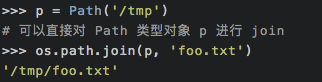

# 建议二：掌握如何流式读取大文件

## 标准做法
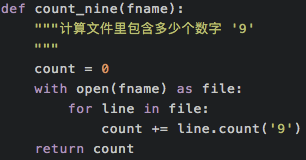

假如我们有一个文件 small_file.txt，那么使用这个函数可以轻松计算出 9 的数量。

## 使用 read 方法分块读取
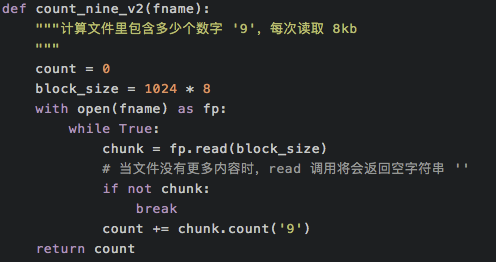

## 利用生成器解耦代码
假如我们在讨论的不是 Python，而是其他编程语言。那么可以说上面的代码已经很好了。但是如果你认真分析一下 count_nine_v2 函数，你会发现在循环体内部，存在着两个独立的逻辑：__数据生成__（read 调用与 chunk 判断） 与 __数据消费__。而这两个独立逻辑被耦合在了一起。

正如我在《编写地道循环》里所提到的，为了提升复用能力，我们可以定义一个新的 chunked_file_reader 生成器函数，由它来负责所有与“数据生成”相关的逻辑。这样 count_nine_v3 里面的主循环就只需要负责计数即可。
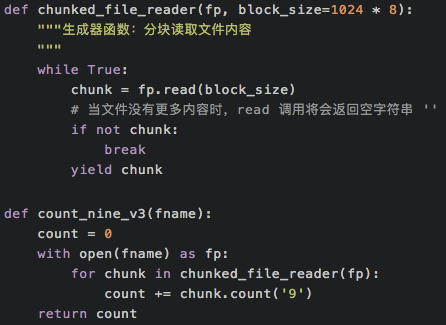

进行到这一步，代码似乎已经没有优化的空间了，但其实不然。iter(iterable) 是一个用来构造迭代器的内建函数，但它还有一个更少人知道的用法。当我们使用 iter(callable,sentinel) 的方式调用它时，会返回一个特殊的对象，迭代它将不断产生可调用对象 callable 的调用结果，直到结果为 setinel 时，迭代终止。
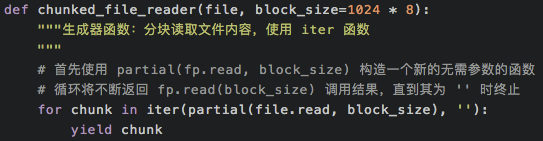

最终，只需要两行代码，我们就完成了一个可复用的分块文件读取函数。那么，这个函数在性能方面的表现如何呢？

和一开始的 2GB 内存/耗时 65 秒 相比，使用生成器的版本只需要 7MB 内存 / 12 秒 就能完成计算。效率提升了接近 4 倍，内存占用更是不到原来的 1%。

# 建议三：设计接受文件对象的函数